In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import glob

from jupyterthemes import jtplot
from ali.ali_sw import *
from ali.ali_peaks import *
from ali.recovery_times import *

In [2]:
jtplot.style('default', grid=False)

## Process peaks 

In [3]:
path = '../../ali_data/ALBA_FBI/*'
files = glob.glob(path)
for i,f in enumerate(files):
    if 'processed_' in f:
        files.pop(i)
files, len(files)

(['../../ali_data/ALBA_FBI/20200310_FBI_NiBr2_400mbar_10ms',
  '../../ali_data/ALBA_FBI/20200310_ALI_AcN_400mbar_10ms',
  '../../ali_data/ALBA_FBI/20200311_cleaning_AcN_400mbar_10ms',
  '../../ali_data/ALBA_FBI/20200311_FBI_Ba_NiBr2_NbSe2_400mbar_10ms',
  '../../ali_data/ALBA_FBI/20200311_cleaning_AcN_300mbar_10ms',
  '../../ali_data/ALBA_FBI/20200311_FBI_NiBr2_NbSe2_400mbar_10ms',
  '../../ali_data/ALBA_FBI/20200311_FBI_FeBr2_NbSe2_400mbar_10ms',
  '../../ali_data/ALBA_FBI/20200310_GAr_1000mbar_10ms'],
 8)

In [48]:
def load_raw_ali_df2 ( filename ) :
    """load a df, if filename correctly found, and transform Date/Time from string to Timestamp type
    For new sw version with decimal point"""
    try:
        dfin = pd.read_table(filename, sep='\t', skiprows=1, header=1, decimal='.', engine='python')
        dfin.columns = ["datetime", "p_chamber" ,"p_act", "p_lock",	"p_pre-inj", "t_valve",	"valve", "time_on"]
        
        try:
            dfin["datetime"] = dfin["datetime"].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S PM.%f'))
        except ValueError:
            dfin["datetime"] = dfin["datetime"].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S AM.%f'))
                   
        return dfin
    except IOError: warnings.warn(f' does not exist: file = {filename} ', UserWarning)

In [10]:
def process_dfRaw_peaks2(path : str, peakLength : int = 0, full : bool = True) -> pd.DataFrame:
    """Method to process ALI raw df into peak df for new sowftare version
    Parameters:
    peakLengthCut : int
        Index slice size per peak. If no value is given, computed as minimum
        distance between peaks."""

    dfRaw = load_raw_ali_df2(path)
    troughs = findTroughsFast(dfRaw)
    dfpeak = extractDfPeaks(dfRaw, troughs, peakLength = peakLength, full = full)

    return dfpeak

In [69]:
dfp = process_dfRaw_peaks2(path = files[2], full = True )
save_processed_peaks(files[2], dfp)

Saving processed peaks df to  ../../ali_data/ALBA_FBI/processed_peaks/20200311_cleaning_AcN_400mbar_10ms.pyk


In [87]:
dfraw = [load_raw_ali_df2(f) for f in files]

In [89]:
for f,dfr in zip(files,dfraw):
    tr = findTroughsFast(dfr)
    dfp = extractDfPeaks(dfr, tr, full=True)
    save_processed_peaks(f, dfp)

Saving processed peaks df to  ../../ali_data/ALBA_FBI/processed_peaks/20200310_FBI_NiBr2_400mbar_10ms.pyk
Saving processed peaks df to  ../../ali_data/ALBA_FBI/processed_peaks/20200310_ALI_AcN_400mbar_10ms.pyk
Saving processed peaks df to  ../../ali_data/ALBA_FBI/processed_peaks/20200311_cleaning_AcN_400mbar_10ms.pyk
Saving processed peaks df to  ../../ali_data/ALBA_FBI/processed_peaks/20200311_FBI_Ba_NiBr2_NbSe2_400mbar_10ms.pyk
Saving processed peaks df to  ../../ali_data/ALBA_FBI/processed_peaks/20200311_cleaning_AcN_300mbar_10ms.pyk
Saving processed peaks df to  ../../ali_data/ALBA_FBI/processed_peaks/20200311_FBI_NiBr2_NbSe2_400mbar_10ms.pyk
Saving processed peaks df to  ../../ali_data/ALBA_FBI/processed_peaks/20200311_FBI_FeBr2_NbSe2_400mbar_10ms.pyk
Saving processed peaks df to  ../../ali_data/ALBA_FBI/processed_peaks/20200310_GAr_1000mbar_10ms.pyk


## Load processed peaks

In [3]:
path = '../../ali_data/ALBA_FBI/processed_peaks/*'
filesp = glob.glob(path)
filesp, len(filesp)

(['../../ali_data/ALBA_FBI/processed_peaks/20200310_GAr_1000mbar_10ms.pyk',
  '../../ali_data/ALBA_FBI/processed_peaks/20200311_cleaning_AcN_300mbar_10ms.pyk',
  '../../ali_data/ALBA_FBI/processed_peaks/20200311_FBI_Ba_NiBr2_NbSe2_400mbar_10ms.pyk',
  '../../ali_data/ALBA_FBI/processed_peaks/20200311_cleaning_AcN_400mbar_10ms.pyk',
  '../../ali_data/ALBA_FBI/processed_peaks/20200310_FBI_NiBr2_400mbar_10ms.pyk',
  '../../ali_data/ALBA_FBI/processed_peaks/20200311_FBI_FeBr2_NbSe2_400mbar_10ms.pyk',
  '../../ali_data/ALBA_FBI/processed_peaks/20200311_FBI_NiBr2_NbSe2_400mbar_10ms.pyk',
  '../../ali_data/ALBA_FBI/processed_peaks/20200310_ALI_AcN_400mbar_10ms.pyk'],
 8)

# Check cleaning run 

In [4]:
filesp[3]

'../../ali_data/ALBA_FBI/processed_peaks/20200311_cleaning_AcN_400mbar_10ms.pyk'

In [140]:
xpClean = import_peaks(filesp[3])
dfp = xpClean.dfp

In [141]:
len(dfp.columns)

253

No handles with labels found to put in legend.


(-0.3, 10)

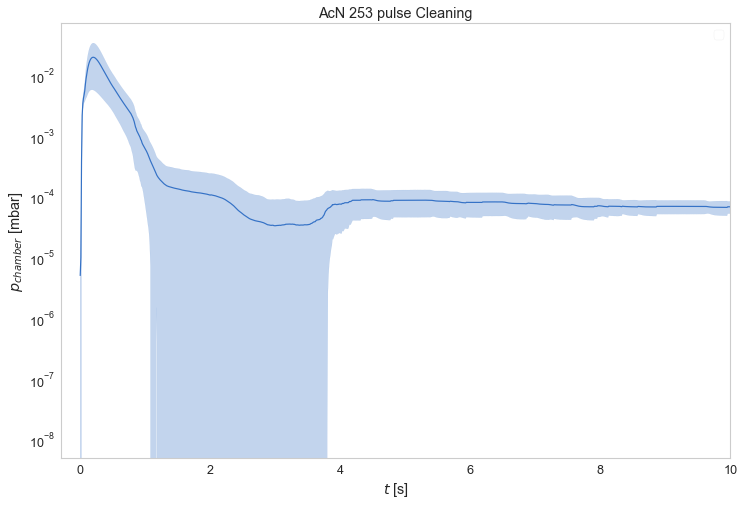

In [146]:
plt.figure(figsize=(12,8))
plotAverageProfile(dfp)
plt.title('AcN %i pulse Cleaning'%len(dfp.columns))
plt.xlim(-0.3,10)

(-0.3, 7)

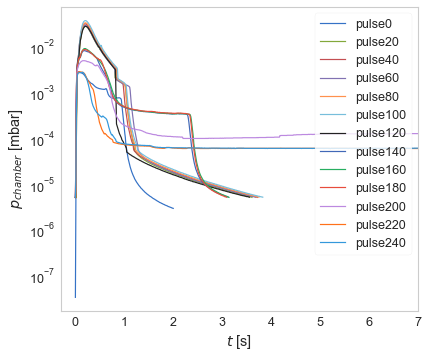

In [110]:
overplot_every_N_pulses(dfp, every=20)
plt.xlim(-.30,7)

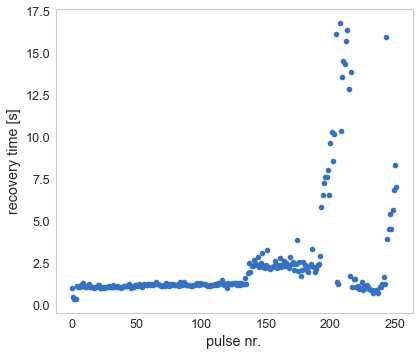

In [112]:
rT = plotRecoveryTimes(dfp, pAct=7e-5, ax=plt.gca())

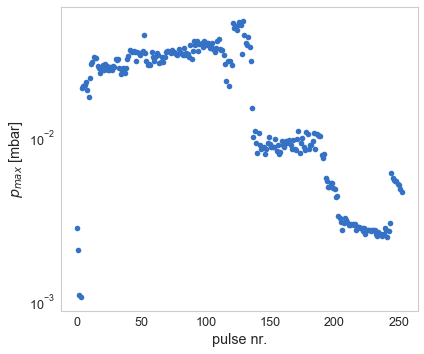

In [102]:
maxP = plot_maxP(dfp, flag_p=True)

## Crop dfp until rec time

In [119]:
dfshort = shorten_dfp(dfp, pThres=1e-5, inTh=3)

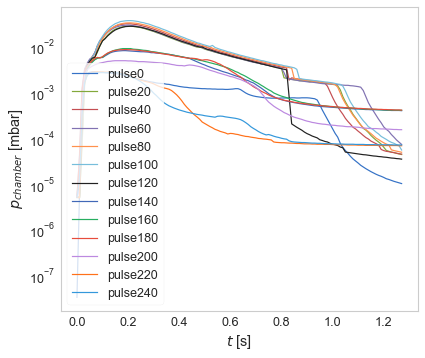

In [120]:
overplot_every_N_pulses(dfshort, every=20)
# plt.xlim(-.30,7)

No handles with labels found to put in legend.


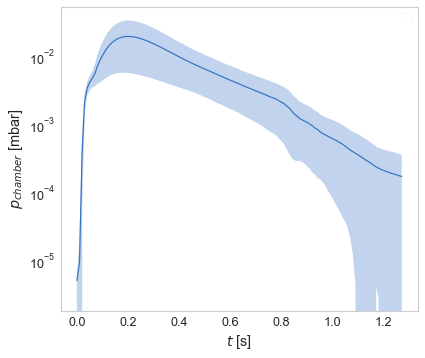

In [121]:
plotAverageProfile(dfshort)

## Split wet/dry

In [124]:
dryP, wetP = split_wet_dry(dfshort, nsigma=1)

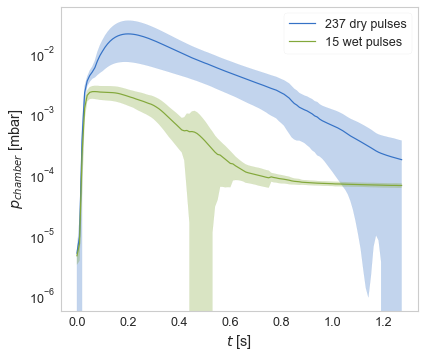

In [127]:
plotAverageProfile(dryP, lb='%i dry pulses' %len(dryP.columns))
plotAverageProfile(wetP, lb='%i wet pulses' %len(wetP.columns))

# Check deposition run on NiBr$_2$ / Au(111)

In [5]:
filesp[4]

'../../ali_data/ALBA_FBI/processed_peaks/20200310_FBI_NiBr2_400mbar_10ms.pyk'

In [6]:
dfp_fbi = import_peaks(filesp[4]).dfp

Text(0.5, 1.0, 'FBI injection on TL NiBr$_2$ on Au(111)')

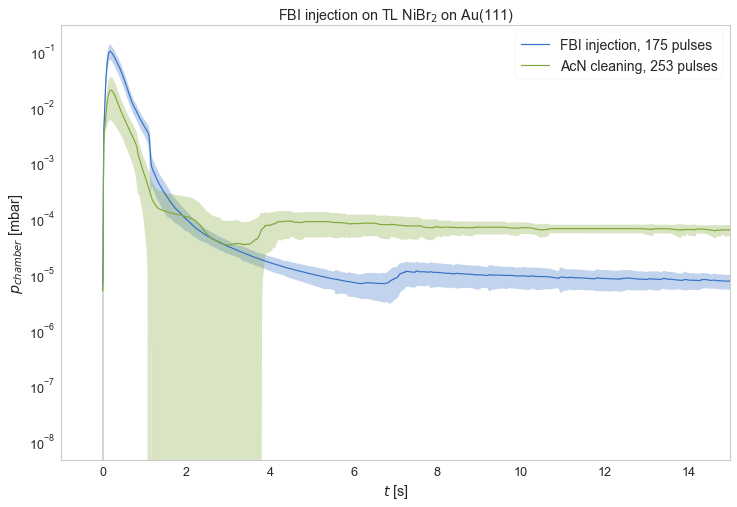

In [147]:
plt.figure(figsize=(12,8))
plotAverageProfile(dfp_fbi, lb='FBI injection, %i pulses' %len(dfp_fbi.columns))
plotAverageProfile(dfp, lb='AcN cleaning, %i pulses' %len(dfp.columns))
plt.xlim(-1, 15)
plt.legend(fontsize=14)
plt.title('FBI injection on TL NiBr$_2$ on Au(111)')

Text(0.5, 1.0, 'Recovery times. FBI injection')

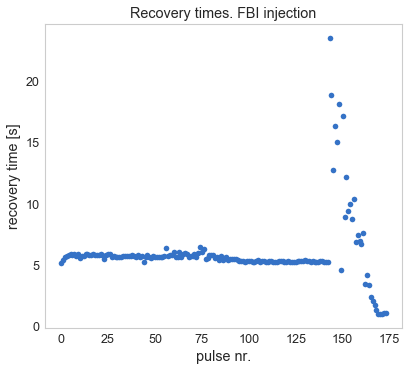

In [7]:
rT = plotRecoveryTimes(dfp_fbi, pAct=7e-6, ax=plt.gca())
plt.title('Recovery times. FBI injection')

Text(0.5, 1.0, 'Max pressure. FBI injection')

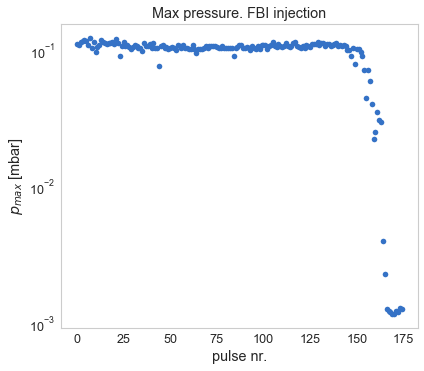

In [8]:
maxP = plot_maxP(dfp_fbi, flag_p=True)
plt.title('Max pressure. FBI injection')

## Split wet/dry

In [9]:
wetPfbi, dryPfbi = split_wet_dry(dfp_fbi)

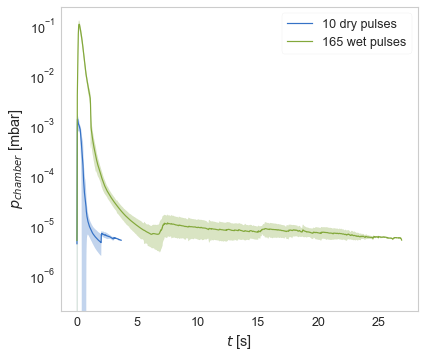

In [11]:
plotAverageProfile(dryPfbi, lb='%i dry pulses' %len(dryPfbi.columns))
plotAverageProfile(wetPfbi, lb='%i wet pulses' %len(wetPfbi.columns))

(-1, 15)

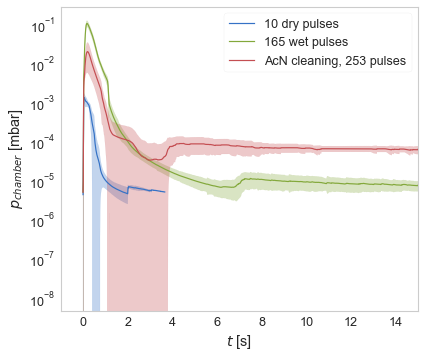

In [242]:
plotAverageProfile(dryPfbi, lb='%i dry pulses' %len(dryPfbi.columns))
plotAverageProfile(wetPfbi, lb='%i wet pulses' %len(wetPfbi.columns))
plotAverageProfile(dfp, lb='AcN cleaning, %i pulses' %len(dfp.columns))
plt.xlim(-1, 15)

# Check deposition run on NiBr$_2$ / NbSe$_2$

In [161]:
filesp[6]

'../../ali_data/ALBA_FBI/processed_peaks/20200311_FBI_NiBr2_NbSe2_400mbar_10ms.pyk'

In [172]:
dfp_fbi_nb = import_peaks(filesp[6]).dfp.iloc[:,2:]

Text(0.5, 1.0, 'FBI injection on TL NiBr$_2$')

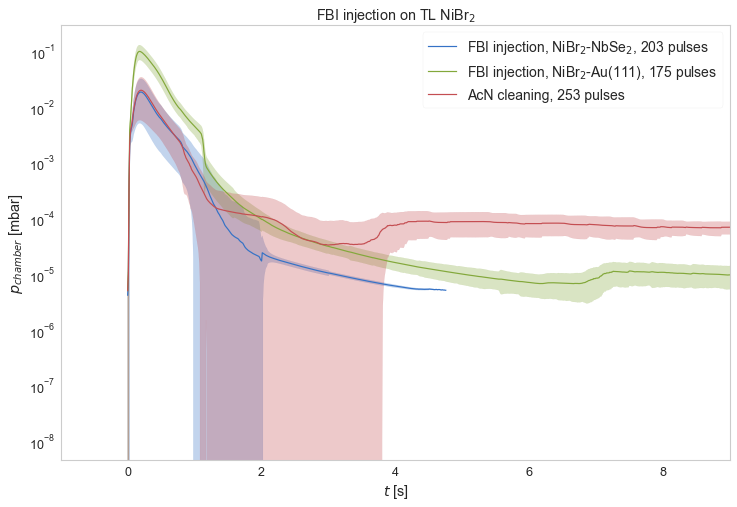

In [173]:
plt.figure(figsize=(12,8))
plotAverageProfile(dfp_fbi_nb, lb='FBI injection, NiBr$_2$-NbSe$_2$, %i pulses' %len(dfp_fbi_nb.columns))
plotAverageProfile(dfp_fbi, lb='FBI injection, NiBr$_2$-Au(111), %i pulses' %len(dfp_fbi.columns))
plotAverageProfile(dfp, lb='AcN cleaning, %i pulses' %len(dfp.columns))
plt.xlim(-1, 9)
plt.legend(fontsize=14)
plt.title('FBI injection on TL NiBr$_2$')

Text(0.5, 1.0, 'Recovery times. FBI injection')

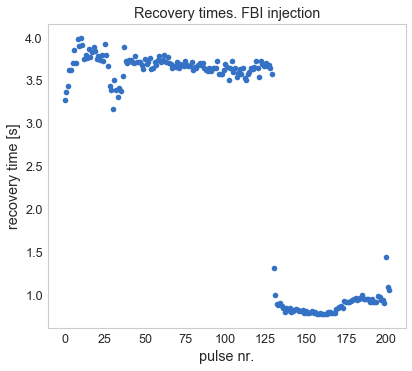

In [174]:
rT = plotRecoveryTimes(dfp_fbi_nb, pAct=7e-6, ax=plt.gca())
plt.title('Recovery times. FBI injection')

Text(0.5, 1.0, 'Max pressure. FBI injection')

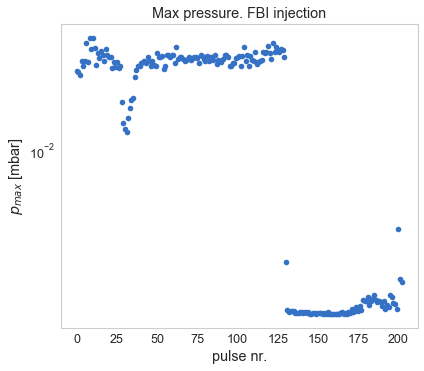

In [177]:
maxP = plot_maxP(dfp_fbi_nb, flag_p=True)
plt.title('Max pressure. FBI injection')

## Split wet/dry

In [197]:
wetPnb, dryPnb = split_wet_dry(dfp_fbi_nb)

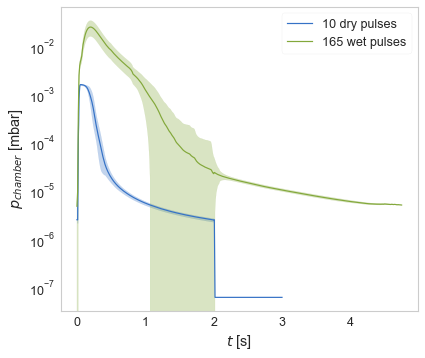

In [198]:
plotAverageProfile(dryPnb, lb='%i dry pulses' %len(dryP.columns))
plotAverageProfile(wetPnb, lb='%i wet pulses' %len(wetP.columns))

(-1, 8)

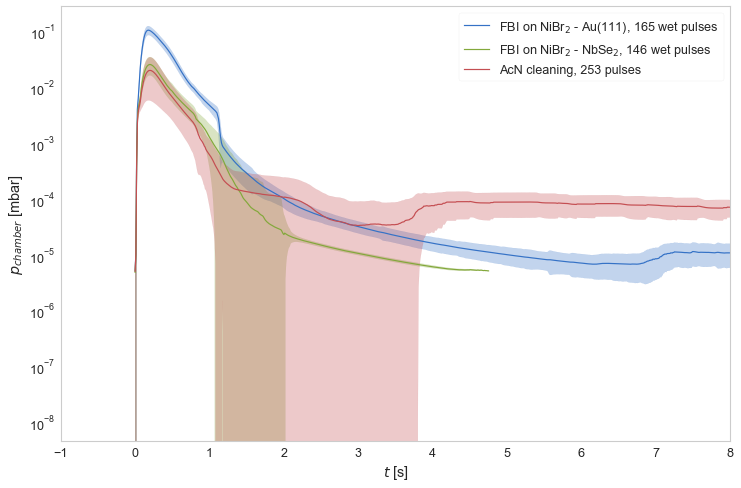

In [201]:
plt.figure(figsize=(12,8))
plotAverageProfile(wetP, lb='FBI on NiBr$_2$ - Au(111), %i wet pulses' %len(wetP.columns))
plotAverageProfile(wetPnb, lb='FBI on NiBr$_2$ - NbSe$_2$, %i wet pulses' %len(wetPnb.columns))
plotAverageProfile(dfp, lb='AcN cleaning, %i pulses' %len(dfp.columns))
plt.xlim(-1, 8)

# Check deposition run on FeBr$_2$ / Au(111)

In [203]:
filesp[5]

'../../ali_data/ALBA_FBI/processed_peaks/20200311_FBI_FeBr2_NbSe2_400mbar_10ms.pyk'

In [208]:
dfp_fbi_fe = import_peaks(filesp[5]).dfp

Text(0.5, 1.0, 'FBI injection on TL NiBr$_2$')

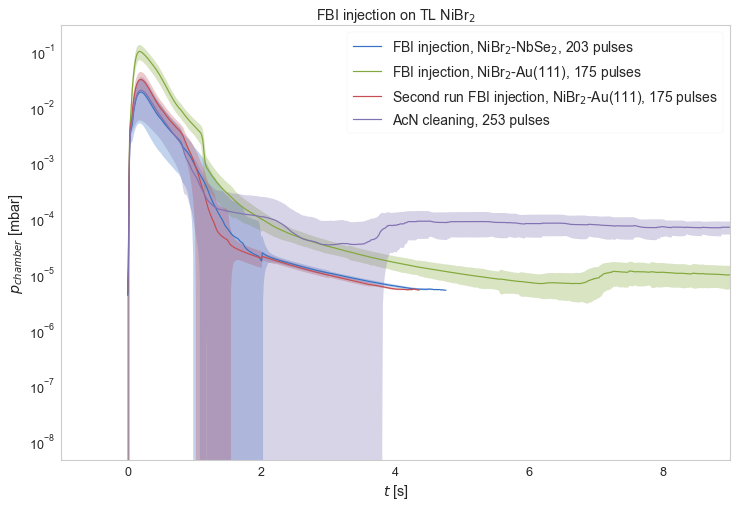

In [209]:
plt.figure(figsize=(12,8))
plotAverageProfile(dfp_fbi_nb, lb='FBI injection, NiBr$_2$-NbSe$_2$, %i pulses' %len(dfp_fbi_nb.columns))
plotAverageProfile(dfp_fbi, lb='FBI injection, NiBr$_2$-Au(111), %i pulses' %len(dfp_fbi.columns))
plotAverageProfile(dfp_fbi_fe, lb='Second run FBI injection, NiBr$_2$-Au(111), %i pulses' %len(dfp_fbi.columns))

plotAverageProfile(dfp, lb='AcN cleaning, %i pulses' %len(dfp.columns))
plt.xlim(-1, 9)
plt.legend(fontsize=14)
plt.title('FBI injection on TL NiBr$_2$')

Text(0.5, 1.0, 'Recovery times. FBI injection')

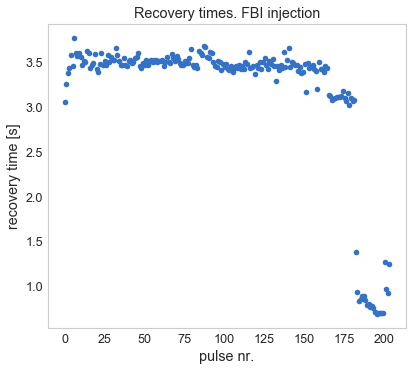

In [210]:
rT = plotRecoveryTimes(dfp_fbi_fe, pAct=7e-6, ax=plt.gca())
plt.title('Recovery times. FBI injection')

Text(0.5, 1.0, 'Max pressure. FBI injection')

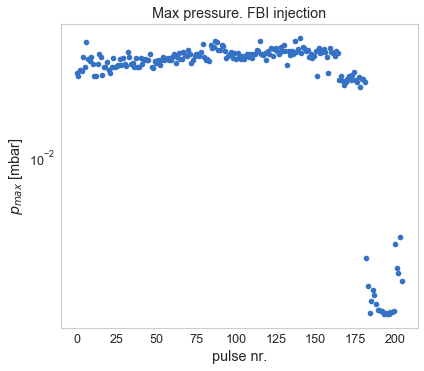

In [211]:
maxP = plot_maxP(dfp_fbi_fe, flag_p=True)
plt.title('Max pressure. FBI injection')

## Split wet/dry

In [212]:
wetPfe, dryPfe = split_wet_dry(dfp_fbi_fe)

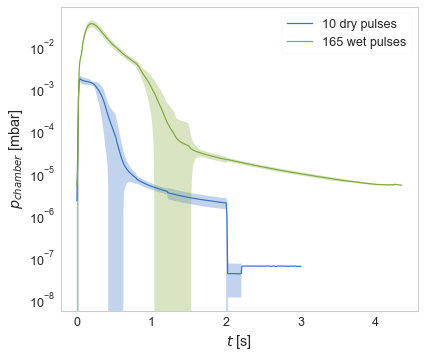

In [213]:
plotAverageProfile(dryPfe, lb='%i dry pulses' %len(dryP.columns))
plotAverageProfile(wetPfe, lb='%i wet pulses' %len(wetP.columns))

# Cleaning ALI to change to Ba(ClO$_4)_2$

In [214]:
filesp

['../../ali_data/ALBA_FBI/processed_peaks/20200310_GAr_1000mbar_10ms.pyk',
 '../../ali_data/ALBA_FBI/processed_peaks/20200311_cleaning_AcN_300mbar_10ms.pyk',
 '../../ali_data/ALBA_FBI/processed_peaks/20200311_FBI_Ba_NiBr2_NbSe2_400mbar_10ms.pyk',
 '../../ali_data/ALBA_FBI/processed_peaks/20200311_cleaning_AcN_400mbar_10ms.pyk',
 '../../ali_data/ALBA_FBI/processed_peaks/20200310_FBI_NiBr2_400mbar_10ms.pyk',
 '../../ali_data/ALBA_FBI/processed_peaks/20200311_FBI_FeBr2_NbSe2_400mbar_10ms.pyk',
 '../../ali_data/ALBA_FBI/processed_peaks/20200311_FBI_NiBr2_NbSe2_400mbar_10ms.pyk',
 '../../ali_data/ALBA_FBI/processed_peaks/20200310_ALI_AcN_400mbar_10ms.pyk']

In [86]:
files[3]

'../../ali_data/ALBA/20200311_cleaning_AcN_300mbar_10ms'

In [218]:
dfp_acn = import_peaks(filesp[1]).dfp

Text(0.5, 1.0, 'Comparison with two cleaning runs')

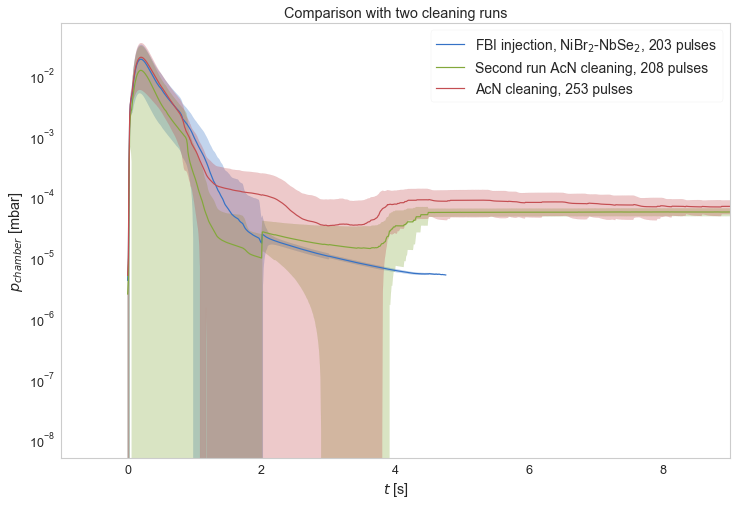

In [221]:
plt.figure(figsize=(12,8))
plotAverageProfile(dfp_fbi_nb, lb='FBI injection, NiBr$_2$-NbSe$_2$, %i pulses' %len(dfp_fbi_nb.columns))
# plotAverageProfile(dfp_fbi, lb='FBI injection, NiBr$_2$-Au(111), %i pulses' %len(dfp_fbi.columns))
plotAverageProfile(dfp_acn, lb='Second run AcN cleaning, %i pulses' %len(dfp_acn.columns))

plotAverageProfile(dfp, lb='AcN cleaning, %i pulses' %len(dfp.columns))
plt.xlim(-1, 9)
plt.legend(fontsize=14)
plt.title('Comparison with two cleaning runs')

Text(0.5, 1.0, 'Recovery times. AcN injection')

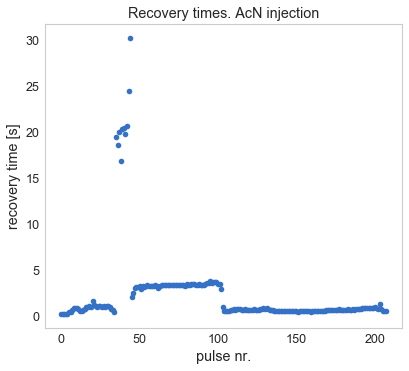

In [222]:
rT = plotRecoveryTimes(dfp_acn, pAct=7e-6, ax=plt.gca())
plt.title('Recovery times. AcN injection')

Text(0.5, 1.0, 'Max pressure. AcN injection')

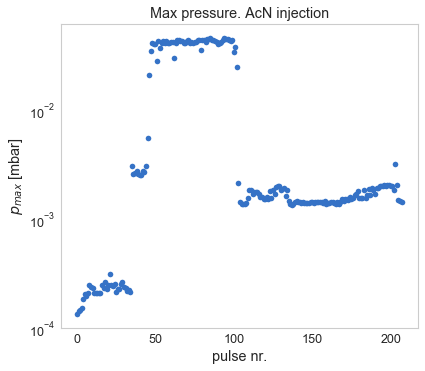

In [223]:
maxP = plot_maxP(dfp_acn, flag_p=True)
plt.title('Max pressure. AcN injection')

## Split wet/dry

In [224]:
wetPacn, dryPacn = split_wet_dry(dfp_acn)

(-1, 5)

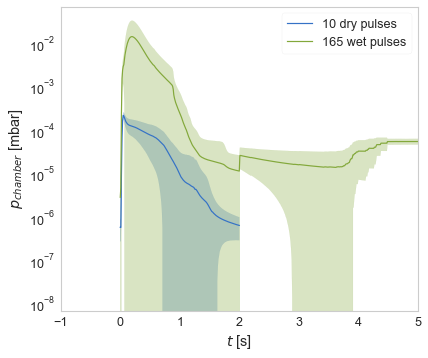

In [226]:
plotAverageProfile(dryPacn, lb='%i dry pulses' %len(dryP.columns))
plotAverageProfile(wetPacn, lb='%i wet pulses' %len(wetP.columns))
plt.xlim(-1,5)

# Depositing Ba(ClO$_4)_2$ on FBI + NbSe$_2$

In [94]:
files[3]

'../../ali_data/ALBA/20200311_FBI_Ba_NiBr2_NbSe2_400mbar_10ms'

In [227]:
filesp

['../../ali_data/ALBA_FBI/processed_peaks/20200310_GAr_1000mbar_10ms.pyk',
 '../../ali_data/ALBA_FBI/processed_peaks/20200311_cleaning_AcN_300mbar_10ms.pyk',
 '../../ali_data/ALBA_FBI/processed_peaks/20200311_FBI_Ba_NiBr2_NbSe2_400mbar_10ms.pyk',
 '../../ali_data/ALBA_FBI/processed_peaks/20200311_cleaning_AcN_400mbar_10ms.pyk',
 '../../ali_data/ALBA_FBI/processed_peaks/20200310_FBI_NiBr2_400mbar_10ms.pyk',
 '../../ali_data/ALBA_FBI/processed_peaks/20200311_FBI_FeBr2_NbSe2_400mbar_10ms.pyk',
 '../../ali_data/ALBA_FBI/processed_peaks/20200311_FBI_NiBr2_NbSe2_400mbar_10ms.pyk',
 '../../ali_data/ALBA_FBI/processed_peaks/20200310_ALI_AcN_400mbar_10ms.pyk']

In [228]:
dfp_ba_nb = import_peaks(filesp[2]).dfp

Text(0.5, 1.0, 'FBI injection on TL NiBr$_2$')

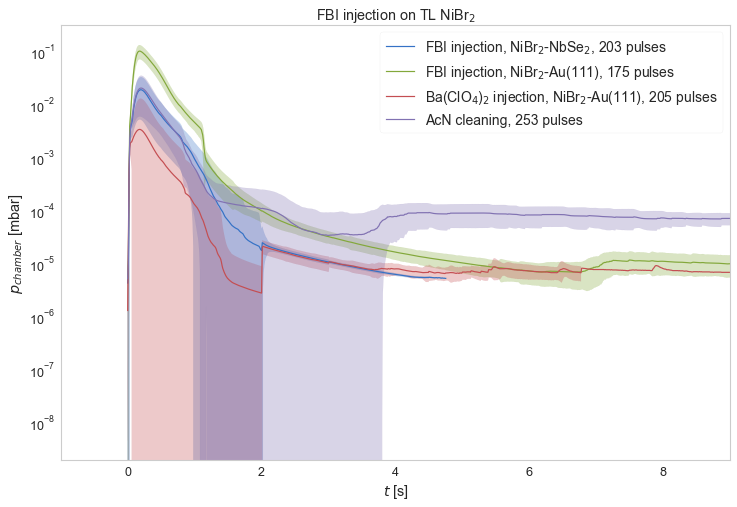

In [229]:
plt.figure(figsize=(12,8))
plotAverageProfile(dfp_fbi_nb, lb='FBI injection, NiBr$_2$-NbSe$_2$, %i pulses' %len(dfp_fbi_nb.columns))
plotAverageProfile(dfp_fbi, lb='FBI injection, NiBr$_2$-Au(111), %i pulses' %len(dfp_fbi.columns))
plotAverageProfile(dfp_ba_nb, lb='Ba(ClO$_4$)$_2$ injection, NiBr$_2$-Au(111), %i pulses' %len(dfp_ba_nb.columns))

plotAverageProfile(dfp, lb='AcN cleaning, %i pulses' %len(dfp.columns))
plt.xlim(-1, 9)
plt.legend(fontsize=14)
plt.title('Comparison FBI/Ba(ClO$_4$)$_2$ injections on TL NiBr$_2$')

(-1, 6)

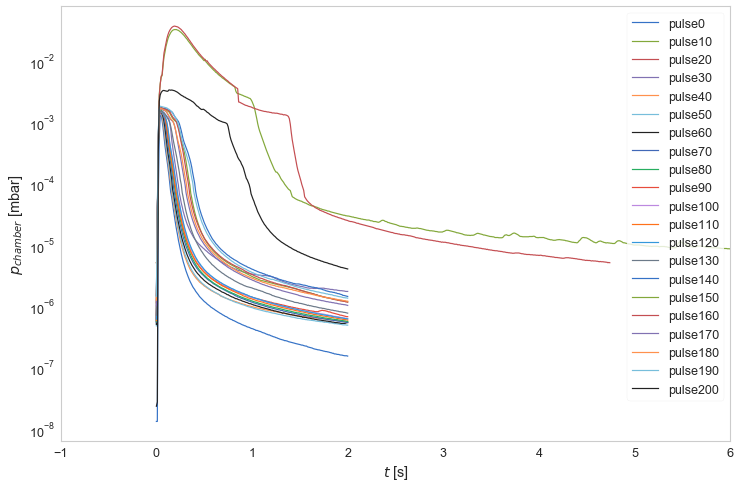

In [236]:
plt.figure(figsize=(12,8))
overplot_every_N_pulses(dfp_ba_nb, every=10)
plt.xlim(-1, 6)

Text(0.5, 1.0, 'Recovery times. FBI injection')

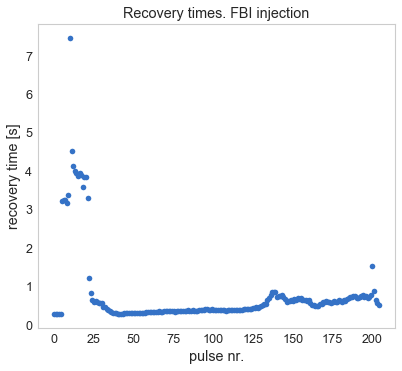

In [230]:
rT = plotRecoveryTimes(dfp_ba_nb, pAct=7e-6, ax=plt.gca())
plt.title('Recovery times. FBI injection')

Text(0.5, 1.0, 'Max pressure. FBI injection')

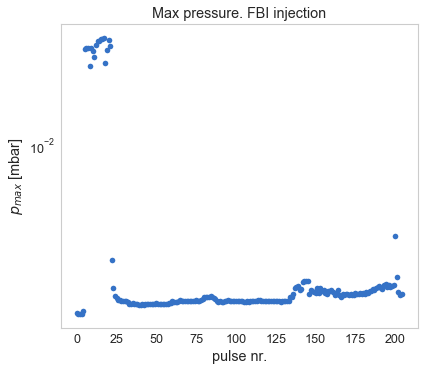

In [231]:
maxP = plot_maxP(dfp_ba_nb, flag_p=True)
plt.title('Max pressure. FBI injection')

## Split wet/dry

In [232]:
wetPba, dryPba = split_wet_dry(dfp_ba_nb)

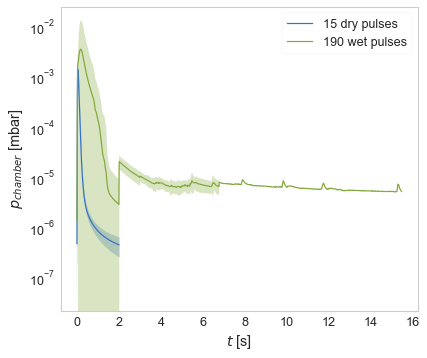

In [237]:
plotAverageProfile(dryPba, lb='%i dry pulses' %len(dryPba.columns))
plotAverageProfile(wetPba, lb='%i wet pulses' %len(wetPba.columns))

Text(0.5, 1.0, 'Comparison FBI/Ba(ClO$_4$)$_2$ injections on TL NiBr$_2$')

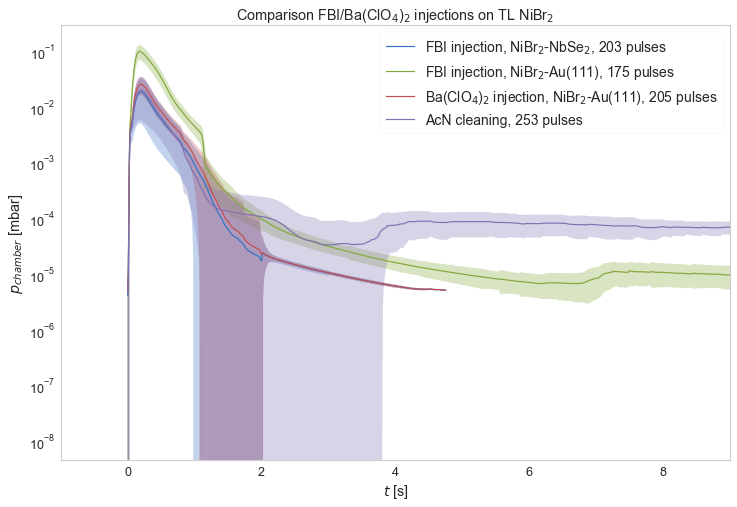

In [238]:
plt.figure(figsize=(12,8))
plotAverageProfile(dfp_fbi_nb, lb='FBI injection, NiBr$_2$-NbSe$_2$, %i pulses' %len(dfp_fbi_nb.columns))
plotAverageProfile(dfp_fbi, lb='FBI injection, NiBr$_2$-Au(111), %i pulses' %len(dfp_fbi.columns))
plotAverageProfile(wetPnb, lb='Ba(ClO$_4$)$_2$ injection, NiBr$_2$-Au(111), %i pulses' %len(dfp_ba_nb.columns))

plotAverageProfile(dfp, lb='AcN cleaning, %i pulses' %len(dfp.columns))
plt.xlim(-1, 9)
plt.legend(fontsize=14)
plt.title('Comparison FBI/Ba(ClO$_4$)$_2$ injections on TL NiBr$_2$')

# Mass leaked per pulse for FBI over NiBr2 / Au(111)

## From V$_{load}$

In [14]:
M_fbi = 31*12 + 35*1 + 3*14 + 5*16
M_fbi

529

In [15]:
Ntot = len(dfp_fbi.columns)
Nwet = len(wetPfbi.columns)
from invisible_cities.core.system_of_units import milimole, micromole, gram, liter, mol
table_vnm_pulses(Ntot, Nwet, C = 1 * micromole / liter, M_ba = M_fbi * gram / mol)

 	 total load 	 per pulse 	 per wet pulse
V [mL]	 3.00e-01 	 1.71e-03 	 1.82e-03
N 	 1.81e+14 	 1.03e+12 	 1.10e+12
m [g] 	 1.59e-07 	 9.07e-10 	 9.62e-10


## From pressure profile

### Seff

No handles with labels found to put in legend.


(0, 3)

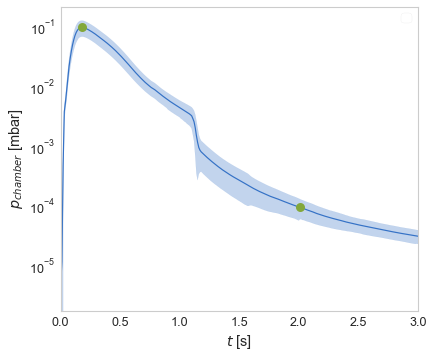

In [61]:
plotAverageProfile(dfp_fbi)
av, sd, _ = avCurves(dfp_fbi)
x = np.arange(len(av))/100

from peakutils import indexes
peaksId = indexes(av, thres=1e-5, thres_abs=True, min_dist=80)
plt.plot(x[peaksId], av[peaksId], 'o', ms=9)
plt.xlim(0,3)

In [60]:
peaksId[0]/100

0.18

In [52]:
def fit_pump_profile(dfp : pd.DataFrame, xdown : list, pdown : list):
    """Fit custom model to average pumping profile of ALI curve
    Model is the sum of two exponential with different decay and a negative power of t
    Input:
    --------
    dfp : ALI curve to extract the average profile
    xdown : array of descend time to perform fit on
    pdown : array of descend pressure to perform fit on"""

    plotAverageProfile(dfp, lb='Average wet profile')

    from scipy.optimize import curve_fit
    def exp2(x, p0, tau, p1, n, p2, beta):
        return p0*np.exp(-tau*(x)) + p1*(x)**n + p2*np.exp(-beta*x)

    fitDw, covDw = curve_fit(exp2, xdown, pdown, p0=[pdown[0], 30, 5e-4, -1/2, 5e-3, 0.5])
    plt.semilogy(xdown, exp2(xdown, *fitDw), '-r', label='Fit model')
    plt.legend()
    return fitDw #np.sqrt(np.diag(covDw))


/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


array([-8.35096545e-01,  1.24365579e+01,  6.02521421e-04, -2.46611837e+00,
        3.47793129e-01,  4.85311246e+00])

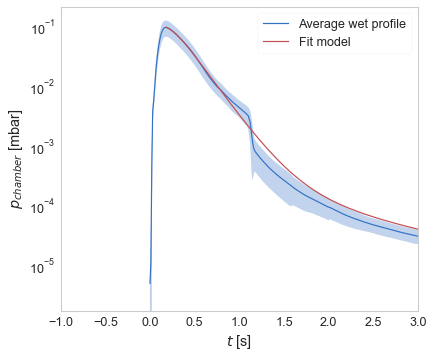

In [62]:
fitc = fit_pump_profile(dfp_fbi, xdown=x[peaksId[0]:peaksId[2]], pdown=av[peaksId[0]:peaksId[2]])
plt.xlim(-1,3)
fitc

In [57]:
S0 = fitc[1] * 4.6
S0

57.20816644951593

In [58]:
1/(1/S0+1/0.26)

0.2588236965928018

### Mass leaked

Text(0.5, 0, 'Pulse nr.')

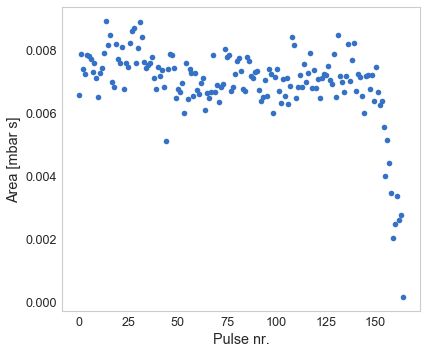

In [252]:
uparea = area_raise(wetPfbi)
plt.plot(uparea, 'o')
plt.ylabel('Area [mbar s]')
plt.xlabel('Pulse nr.')

In [59]:
avLeakMass(wetPfbi)

(5.185074377838277e-07, 0.001738679869727273)